## Generators

#### Generator Nedir

Generatörler, iterator'lerle bir çok açıdan benzerlik taşır. İteratörlerde olduğu gibi __next__() fonksiyonuna sahiptir ve bu sayede iterasyon işlemine tabi tutulabilirler.<br>

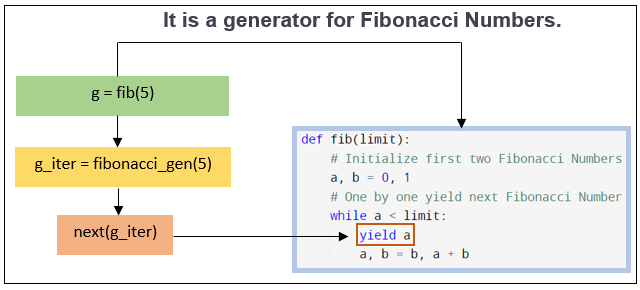

Generatörler için en önemli komut <b>yield</b>'dir. Bir fonksiyonun içerisinde yield kelimesi varsa o fonksiyon generatör fonksiyonudur diyebiliriz.

Aslında bir fonksiyonda yield ve return ifadesi aynı değeri döndürür. Ancak, return ifadesi bir fonksiyonu sonlandırırken, yield ifadesi değeri döndürür, saklar ve fonksiyonu çağırma devam eder.

Generatör fonksiyonları interpreter tarafından farklı bir şekilde değerlendirilir. Normalde return değeri olan -ya da olmayan- bir fonksiyonu çağırdığınızda scope baştan sonra kadar execute edilir ve kontrol fonksiyonun çağrıldığı yere bırakılır. Fonksiyonu tekrar çağırdığınızda tekrar scope baştan sonra kadar execute edilir.
Generatör fonksiyonlarında ise fonksiyon içerisindeki durum hatırlanır. Aşağıdaki örneği inceleyelim.

In [12]:
# Basit bir generator
def my_generator():
    i = 1
    print('Birinci')
    yield i
 
    i += 1
    print('İkinci')
    yield i
 
    i += 1
    print('Üçüncü')
    yield i
 
x = my_generator()
print(next(x))
print(next(x))
print(next(x))

Birinci
1
İkinci
2
Üçüncü
3


Şimdi kodu yorumlayalım. next komutu ile yapılan her çağırma işleminde, yield bölümüne kadar fonksiyon çalışır. Burada duraklar ve yeni bir çağırma bekler. Yeni çağırmada tekrar çalışır. Durum kalmayıncaya kadar işlem devam eder. Ve durum kalmayınca bir StopIteration oluşur. Aynı işlemi for döngüsü ile yaparsak:

Generatörlerin iterasyon işlemleri için aşağıdaki örneğe bakalım.

In [ ]:
for deger in my_generator():
    print(deger)

Yukarıdaki örnekte; "for loop" bu generatörün next() fonksiyonunu çağırır. Her next çağırdığında bir sonraki yield’a kadar execute eder. Ta ki exception alana kadar.

##### Uygulama 1

Kare hesaplama işlemini öncelikle normal bir fonksiyon kullanarak yapalım.

In [17]:
def karehesapla():
    sonuç = []
    
    for i in range(1,8):
        sonuç.append(i**2)
    return sonuç
 
print(karehesapla())

[1, 4, 9, 16, 25, 36, 49]


Şimdi de bu fonksiyonu bir generator kullanarak tekrar yazalım.

In [19]:
def karehesapla():
    for i in range(1,8):
        yield i ** 2 # Burada yield, generator'ün değer üretmesi için kullanılıyor.
        
generator =  karehesapla()
 
print(generator) # Generator objesi

<generator object karehesapla at 0x0000028F729035C8>


İlk fonksiyonda, 1'den 8'e kadar her bir değerin karesi sonuç isimli bir listeye atılıyor ve sonrasında bu liste döndürülüyor. Bu durumda bellekte liste değişkenin içinde 1,4,9,16,25 değerleri tutuluyor.

Generatör ile yazılan 2.fonksiyonda ise fonksiyonu çağırdığımızda bize sadece bir tane generatör objesi gönderiliyor. Ve biz sadece generator objesinin değerlerine ulaşmaya çalıştığımızda değerler tek tek üretiliyor. Yani kısacası bellekte değerler tutulmuyor. [1]

Bu generator objesinin üzerinde bir tane iterator oluşturarak durumu daha iyi anlamaya çalışalım.

In [8]:
iterator = iter(generator)
 
print(next(iterator)) # 1 değeri üretildi
print(next(iterator)) # 4 değeri üretildi 1 değeri artık yok.
print(next(iterator)) # 9 değeri üretildi 4 değeri artık yok.
print(next(iterator)) # 16 değeri üretildi 9 değeri artık yok.
print(next(iterator)) # 25 değeri üretildi 16 değeri artık yok.
print(next(iterator)) # Üretilecek değer kalmadı.

1
4
9
16
25


StopIteration: 

Görüldüğü gibi generator objesi sadece değerlere ulaşmak istediğimiz zaman <b>yield</b> anahtar kelimesini kullanıp değer üretiyor. Yani generatorler sadece biz değerlere ulaşmak istersek çalışıyor. Generatörlerin mantığı bu şekilde diyebiliriz.

##### Uygulama 2: List comprehension'ların generatörlere dönüşümü

In [20]:
mylist = [i * 2 for i in range(10)]
 
print(mylist)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


Bir list comprehension’ı generator objesine çevirmek için [ ] yerine () kullanıyoruz.

In [21]:
generator = (i * 2 for i in range(10))
 
iterator = iter(generator)
 
print(next(iterator))
print(next(iterator))
print(next(iterator))
print(next(iterator))
print(next(iterator))
print(next(iterator))

0
2
4
6
8
10


##### Soru: Generatör ile İteratör arasındaki fark nedir

Bir objeyi itere etmek istediğinizde liste elemanları ile birlikte itere edilmeye hazırdır ve sırası ile bu elemanları çağırarak işlemlerinizi gerçekleştirmeye başlarsınız. <br>
Generatörlerde ise hali hazırda iterasyona tabi tutacağınız elemanlar mevcut değildir, siz __next__() ile bir sonrakini çağırdığınız zaman üretilir ve size gerekli bilgi iletilir. <br>
Bu işlemin faydası ise; yapacağınız işlem için bir listenin tüm elemanlarına ihtiyacınız yoksa veya ne kadarını kullanacağınızı bilmiyorsanız boşu boşuna listenin hepsini oluşturup belleği şişirmek doğru olmayacaktır. Bunun yerine generatör kullanarak ihtiyaç duydukça elemanların üretilmesini sağlayıp fazla bellek kullanımının önüne geçebilirsiniz. [2]

Python yorumlayıcısının işletim sisteminden aldığı belleği geri vermediğini göz önüne alırsak, büyük miktarda veriyi işlerken generatörlerin oldukça faydalı olacağı açıktır.[2]

#### Referanslar

1. https://www.yazilimbilimi.org/python-generatorlar/
2. https://medium.com/python-yaz-lar/python-generator-ve-i-teratorler-a53e59f7c5b1